In [1]:
import pandas as pd

ds = pd.read_excel ("RetailData.xlsx", sheet_name=0)
ds

,ProductId,buyer_name,Rating
0,43011141,Jayne Martin,5
1,40261885,Larry Myers,3
2,42998893,Theresa Chianese,4
3,43095842,Justin Jeanneret,3
4,42905919,John Grof,1
...,...,...,...
7846,43114893,Sherry Wilson-Bey,4
7847,42897890,Sherry Wilson-Bey,2
7848,42971571,Sherry Wilson-Bey,3
7849,40037981,Richard Poole PO#3907,1


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [3]:
ds = ds.dropna()

In [4]:
ds.shape

(7851, 3)

# Recommendation System ( Type 1 )

In [5]:
popular_products = pd.DataFrame(ds.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
42994389,97
43095842,74
41126735,63
41077654,51
42913048,47
40991285,47
42905573,40
43103566,37
42974156,37


<AxesSubplot:xlabel='ProductId'>

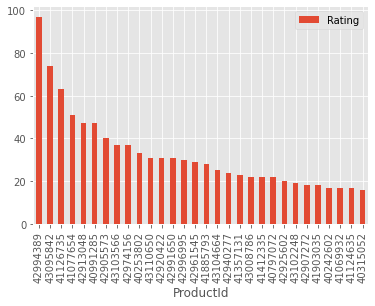

In [6]:
most_popular.head(30).plot(kind = "bar")

Analysis:

The above graph gives us the most popular products (arranged in descending order) sold by the business.

For eaxmple, product, ID # 42994389 , the next most popular product, ID # 43095842

# Recommendation System ( Type 2 )

In [7]:
# Model-based collaborative filtering system
# Utility Matrix based on products sold and user reviews
# Subset of Rating

ds1 = ds.head(1000)

In [8]:
ratings_utility_matrix = ds1.pivot_table(values='Rating', index='buyer_name', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,40003552,40003762,40014472,40017036,40037605,40041562,40044701,40048024,40048035,40048142,...,43119171,43121066,43121328,43121378,43122883,43122975,43124196,43124293,43124629,43124998
buyer_name,,,,,,,,,,,,,,,,,,,,,
ABID AHMAD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AP AP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ATHANASIOS KOTSONIS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AXON CORP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aarif Shiwratan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
ratings_utility_matrix.shape

(859, 739)

In [10]:
# Transposing the matrix

X = ratings_utility_matrix.T
X.head()

buyer_name,ABID AHMAD,AP AP,ATHANASIOS KOTSONIS,AXON CORP,Aarif Shiwratan,Aaron Espinoza,Aaron Messer,Accounts Payable,Adah Silver,Adrienne Bolduc,...,sharon lewis,shelley zimecki,steve parsche,tanecia wallace,teresa cline,thomas ashbahian,timothy gundrum,widodo sudomo,william person,yong zhou
ProductId,,,,,,,,,,,,,,,,,,,,,
40003552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40003762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40014472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40017036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40037605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
X.shape

(739, 859)

In [12]:
# Unique products in subset of data

X1 = X

In [13]:
# Decomposing the Matrix

SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(739, 10)

In [14]:
# Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(739, 739)

In [15]:
# Isolating ID # 40780740 from the Correlation Matrix
# Assuming the customer buys Product ID # 40780740 (randomly chosen)


X.index[99]

40780740

In [16]:
product_ID=99

In [17]:
# Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(739,)

In [18]:
# Recommending top 10 highly correlated products in sequence

Recommend = list(X.index[correlation_product_ID > 0.80])

# Removes the item already bought by the customer
Recommend.remove(40780740) 

Recommend[0:9]

[40014472,
 40062632,
 40102075,
 40147505,
 40206633,
 40253861,
 40261885,
 40278980,
 40357833]

In [19]:
Recommended_Product = Recommend[0:9]

# List of Top Recommended Products

In [20]:
Recommended_Product

[40014472,
 40062632,
 40102075,
 40147505,
 40206633,
 40253861,
 40261885,
 40278980,
 40357833]

### Here are the top products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website

### NOTE : The Recommended Products display the ProductId which is the SKU ID as mentioned in the data provided.